# Getting started

## Interactive usage

Niche Vlaanderen can be used interactively in Python. For interactive use, we recommend using the [Jupyter notebook](https://inbo.github.io/niche_vlaanderen/installation.html#running-niche). This allows one to save documentation, code and results in the same file.

This file itself is a notebook, and if you want to reproduce our result this is possible:

 * Download the [niche sourcecode](https://github.com/inbo/niche_vlaanderen/releases) (use the zip file).
 * Extract the file and navigate to the `docs` folder from the anaconda prompt. Make sure you also extract the testcases directory, as this contains the data we will be using.
 * Activate the niche environment: `activate niche` (not necessary if you used the alternative install).
 * Run Jupyter notebook: `jupyter notebook`. This should open a web page (similar or equal to http://localhost:8888 ) - check your anaconda prompt for a link if this is not the case.
 * Navigate your web browser to the `getting_started.ipynb` file (in the Files tab, which should be opened by default).
 * Any cell with code can be run by by pressing Ctrl+Enter. If you are unfamiliar with notebooks, you can take some time familiarizing yourself by taking the User interface tour from the `Help` menu.

## Steps to create a Niche model
To calculate a Niche model one has to take the following steps:

 * Initialize the model (create a ``Niche`` object)
 * Add the different input grids (or constant values) to the model (``set_input`` method)
 * Run the model (``run`` method)
 * Optionally inspect the results using ``plot()`` and ``table``.
 * Save the results (``write`` method).

These steps are mirrored in the design of the ``Niche`` class which is given below.

Optionally the user can also create difference maps showing how much MHW/MLW has
to change to allow a certain vegetation type. This is done using the ``deviation`` parameter of the ``run`` method.



## Creating a simple NICHE model

For our first example, we will be creating a [simple model](https://inbo.github.io/niche_vlaanderen/vegetatie.html#eenvoudig-niche-model), using only MHW, MLW and soil for the predictions.

The first step is importing the `niche_vlaanderen` module. For convenience, we will be importing as `nv`. 

In [1]:
import niche_vlaanderen as nv

### Creating a niche object
Next we create a `Niche` object. This object will hold all the data and results for an analysis. 

In [2]:
simple = nv.Niche()

### Adding input files

After initialization, we can add input layers to this object, using the `set_input` method.

In [3]:
simple.set_input("mhw","../testcase/zwarte_beek/input/mhw.asc")
simple.set_input("mlw","../testcase/zwarte_beek/input/mlw.asc")
simple.set_input("soil_code","../testcase/zwarte_beek/input/soil_code.asc")

### Running the model
These three input files are the only required for running a simple NICHE model. This means we can already run our model.

In [4]:
simple.run(full_model=False)

### Inspecting the model
After a model is run, we can inspect the results using the `table` method. Note that the values are given in ha. In the example below we also use the [head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to show only the first five rows.

In [5]:
simple.table.head()

/home/travis/virtualenv/python3.7.1/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,vegetation,presence,area_ha
0,1,no data,15.16
1,1,not present,14.44
2,1,present,9.88
3,2,no data,15.16
4,2,present,12.80


The returned object is a [Pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/10min.html) which makes it easy to manipulate (for example calculating a crosstabulation, filtering, ...) or save it to a file. Below we present two examples which can be useful when working with these data. The first is saving the data to a csv file.

In [6]:
simple.table.to_csv("demo.csv")

/home/travis/virtualenv/python3.7.1/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


By using the pandas [pivot_table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html#pandas.DataFrame.pivot_table) method, we can create a summarized table. Note that only the first 5 rows are shown because we use the [head](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function

In [7]:
result = simple.table.pivot_table(index="vegetation", 
                            values="area_ha", 
                            columns="presence",
                            fill_value=0).head()

result

presence,no data,not present,present
vegetation,,,
1,15.16,14.44,9.88
2,15.16,11.52,12.80
3,15.16,5.88,18.44
4,15.16,21.16,3.16
5,15.16,24.32,0.00


It is also possible to show actual grids using the `plot` method.

In [8]:
simple.plot(11)
import matplotlib.pyplot as plt
%matplotlib inline
plt.show()

/home/travis/virtualenv/python3.7.1/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


It is possible to give your model a `name` - this will be shown when plotting and will be used when writing the files.

/home/travis/virtualenv/python3.7.1/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


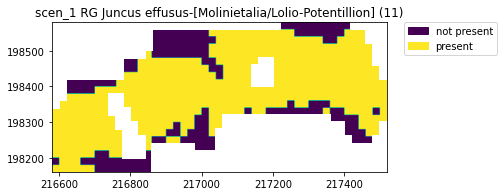

In [9]:
simple.name="scen_1"
simple.plot(11)

plt.show()

### Saving the model
The model results can be saved to disk using the ``write`` function. As an argument, this takes the directory to which you want to save, \_output_scen1 in our example. When saving a model, the log file, containing the model configuration, a summary table and all 28 vegetation grids will be saved.
Note we specify the `overwrite_files` option so subsequent calls of the example will not raise an error

In [10]:
simple.write("_output_scen1", overwrite_files=True)

Below you can see the list of files that is generated by this operation: There are the 28 vegetation grids (`*.tif` files), the summary table (`summary.csv`) and a logfile (`log.txt`). All files are prepended with the model `name` we set earlier.

In [11]:
import os
os.listdir("_output_scen1")

['scen_1_V01.tif',
 'scen_1_V08.tif',
 'scen_1_V05.tif',
 'scen_1_V18.tif',
 'scen_1_V02.tif',
 'scen_1_V23.tif',
 'scen_1_V24.tif',
 'scen_1_V10.tif',
 'scen_1_V26.tif',
 'scen_1_V07.tif',
 'scen_1_V09.tif',
 'scen_1_V19.tif',
 'scen_1_V04.tif',
 'scen_1_V15.tif',
 'scen_1_V11.tif',
 'scen_1_V27.tif',
 'scen_1_V16.tif',
 'scen_1_V20.tif',
 'scen_1_V21.tif',
 'scen_1_V28.tif',
 'scen_1_summary.csv',
 'scen_1_V03.tif',
 'scen_1_V06.tif',
 'scen_1_V17.tif',
 'scen_1_V22.tif',
 'scen_1_V12.tif',
 'scen_1_V25.tif',
 'scen_1_log.txt',
 'scen_1_V13.tif',
 'scen_1_V14.tif']

### Showing the model configuration
While using niche, it is always possible to view the configuration by typing the object name. 

In [12]:
simple

# Niche Vlaanderen version: 1.1
# Using latest niche_vlaanderen  1.1
# Run at: 2020-09-21 10:48:16.014371

package_versions:
  pandas: 1.1.2
  numpy: 1.16.4
  rasterio: 1.1.6
  gdal: 2.4.4
  python: '3.7.1 (default, Jun 12 2019, 01:22:06) 
[GCC 5.4.0 20160609]'

model_options:
  abiotic: false
  deviation: false
  full_model: false
  name: scen_1
  output_dir: _output_scen1
  strict_checks: true
  
model_properties:
  model_extent: ((216580.0, 198580.0), (217520.0, 198160.0))

input_layers:
  mhw: ../testcase/zwarte_beek/input/mhw.asc
  mlw: ../testcase/zwarte_beek/input/mlw.asc
  soil_code: ../testcase/zwarte_beek/input/soil_code.asc
  # Model run completed
files_written:
  1: _output_scen1/scen_1_V01.tif
  2: _output_scen1/scen_1_V02.tif
  3: _output_scen1/scen_1_V03.tif
  4: _output_scen1/scen_1_V04.tif
  5: _output_scen1/scen_1_V05.tif
  6: _output_scen1/scen_1_V06.tif
  7: _output_scen1/scen_1_V07.tif
  8: _output_scen1/scen_1_V08.tif
  9: _output_scen1/scen_1_V09.tif
  10: _outpu

<div class="alert alert-info">
Note that this overview contains the same information as the logfile which we wrote before. Later on, we will show that this can be used as input when running Niche with a configuration file (either from [within Python](advanced_usage.ipynb#Using-config-files) or from the [command line](cli.rst)).
</div>

## Running a full Niche model

A full Niche model requires more inputs that only mhw, mlw and soil_code. The full list can be found in the [documentation](cli.rst#full-model). It is also possible to look at the `minimal_input` set. When trying to run a model without sufficient inputs, a warning will be generated.

In [13]:
nv.niche.minimal_input()

{'inundation_acidity',
 'inundation_nutrient',
 'management',
 'mhw',
 'minerality',
 'mlw',
 'msw',
 'nitrogen_animal',
 'nitrogen_atmospheric',
 'nitrogen_fertilizer',
 'rainwater',
 'seepage',
 'soil_code'}

If we add all the required values, we can run the full model. Note that it is possible to set a constant value instead of a complete grid

In [14]:
full = nv.Niche()
path = "../testcase/zwarte_beek/input/"
full.set_input("mhw", path + "mhw.asc")
full.set_input("mlw", path + "mlw.asc")
full.set_input("soil_code", path + "soil_code.asc")
full.set_input("nitrogen_animal", 0)
full.set_input("inundation_acidity", path + "inundation.asc")
full.set_input("inundation_nutrient", path + "inundation.asc")
full.set_input("nitrogen_fertilizer",0)
full.set_input("minerality", path + "minerality.asc")
full.set_input("management", path + "management.asc")
full.set_input("nitrogen_atmospheric", 0)
full.set_input("msw", path + "msw.asc")
full.set_input("rainwater", 0)
full.set_input("seepage", path + "seepage.asc")
full.run()

We can look at the full model using the same `table` and `plot` functions as we used for the simple model.

In [15]:
full.table.head()

/home/travis/virtualenv/python3.7.1/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,vegetation,presence,area_ha
0,1,not present,15.44
1,1,no data,15.16
2,1,present,8.88
3,2,not present,21.52
4,2,no data,15.16


Comparing to the simple model, one can observe that the area where a vegetation type can be present is always smaller than in the simple model.

In [16]:
simple.table.head()

/home/travis/virtualenv/python3.7.1/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,vegetation,presence,area_ha
0,1,no data,15.16
1,1,not present,14.44
2,1,present,9.88
3,2,no data,15.16
4,2,present,12.80


In the next tutorial, we will focus on more [advanced methods for using the package](https://inbo.github.io/niche_vlaanderen/advanced_usage.html), starting with the comparison of these two models.